## 3D Visualization of Vector Embeddings

In [1]:
# imports

import os
import re
import math
import json
from tqdm import tqdm
import random
from dotenv import load_dotenv
from huggingface_hub import login
import numpy as np
import pickle
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import chromadb
from sklearn.manifold import TSNE
import plotly.graph_objects as go

/Volumes/VTG/Dev/C_5/Projects/week8/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MAXIMUM_DATAPOINTS = 10_000

In [3]:
DB = "products_vectorstore"
client = chromadb.PersistentClient(path=DB)

In [4]:
collection = client.get_or_create_collection("product")

In [5]:
CATEGORIES = ['Appliances', 'Automotive', 'Cell_Phones_and_Accessories', 'Electronics','Musical_Instruments', 'Office_Products', 'Tools_and_Home_Improvement', 'Toys_and_Games', "Industrial_and_Scientific", "Arts_Crafts_and_Sewing", "Handmade_Products", "All_Beauty", "Gift_Cards"]
COLORS = ['red', 'blue', 'brown', 'orange', 'yellow', 'green' , 'purple', 'cyan', "purple", "black", "gray", "pink", "olive"]

In [6]:
result = collection.get(include=["embeddings", "documents", "metadatas"],limit=MAXIMUM_DATAPOINTS)
vectors = np.array(result["embeddings"])
documents = result["documents"]
categories = [meta["category"] for meta in result["metadatas"]]
colors = [COLORS[CATEGORIES.index(c)] for c in categories]

In [7]:
### 3D Visualization of Embeddings Using t-SNE
tsne = TSNE(n_components=3, random_state=42, n_jobs=1)
reduced_vectors = tsne.fit_transform(vectors) ### reduced into 3D

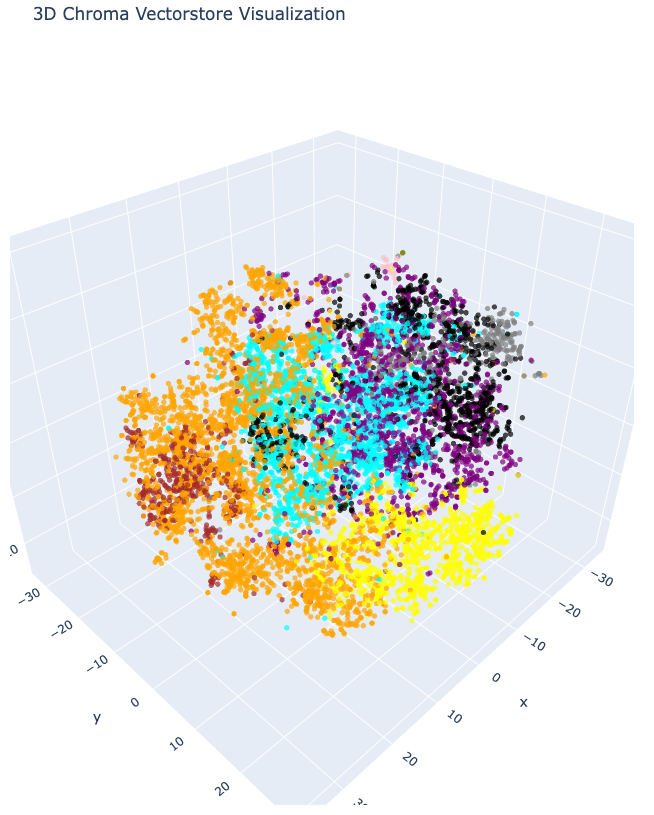

In [9]:
# Create the 2D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_vectors[:, 0],
    y=reduced_vectors[:, 1],
    z=reduced_vectors[:, 2],
    mode='markers',
    marker=dict(size=3, color=colors, opacity=0.7),
    text=[f"Category: {c}<br>Text: {d[:150]}..." for c, d in zip(categories, documents)],
    hoverinfo="text"
)])

fig.update_layout(
    title='3D Chroma Vectorstore Visualization',
    scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title="z"),
    width=1200,
    height=800,
    margin=dict(r=20, b=10, l=10, t=40)
)

fig.show()